In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, RANSACRegressor, HuberRegressor, TheilSenRegressor, QuantileRegressor
from sklearn.metrics import r2_score

https://stackoverflow.com/questions/78212120/how-to-exclude-abnormal-data-points-and-smooth-the-data-before-linear-fitting

In [14]:
def prepare(suffix):
    # Load:
    x = pd.read_csv("box" + suffix, sep="\t", header=None, names=["id", "x"])
    y = pd.read_csv("pres" + suffix, sep="\t", header=None, names=["id", "y"])
    # Merge:
    data = x.merge(y, on=["id"])
    # Post process:
    data["strain"] = data["x"] / data["x"][0] - 1.
    data["stress"] = - data["y"] / 10_000.
    return data

In [59]:
def analyse(data):
    # Regress:
    X, y = data["strain"].values.reshape(-1, 1), data["stress"].values
    regressor = TheilSenRegressor()
    regressor.fit(X, y)
    # Predict:
    yhat = regressor.predict(X)
    score = r2_score(y, yhat)
    # Render:
    fig, axe = plt.subplots()
    axe.scatter(X, y)
    axe.plot(X, yhat, color="orange")
    axe.set_title("Regression")
    axe.set_xlabel("Strain")
    axe.set_ylabel("Stress")
    axe.set_ylim([0, 1])
    axe.grid()
    return {
        "slope": regressor.coef_,
        "intercept": regressor.intercept_,
        "score": score,
        "axe": axe
    }

{'slope': array([2.2376892]),
 'intercept': 0.02557950206929829,
 'score': 0.7909145593959713,
 'axe': <AxesSubplot:title={'center':'Regression'}, xlabel='Strain', ylabel='Stress'>}

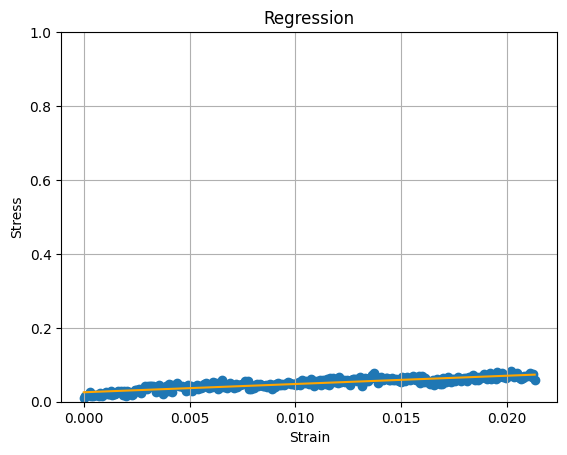

In [60]:
df1 = prepare("-xx_0water_150peg.dat")
sol1 = analyse(df1)
sol1

{'slope': array([30.19079023]),
 'intercept': -0.0057025728701871154,
 'score': 0.007753875424794332,
 'axe': <AxesSubplot:title={'center':'Regression'}, xlabel='Strain', ylabel='Stress'>}

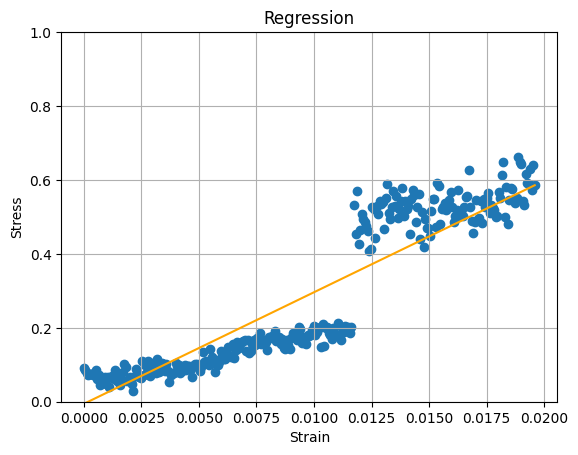

In [61]:
df2 = prepare("-yy_200water_150peg.dat")
sol2 = analyse(df2)
sol2